## Problem set 1, Intro to NLP 2018

#### This is due on September 25, 2018, submitted electronically. 100 points total.

##### How to do this problem set:

- What version of Python should I use? 3.6!

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out a supporting file, `hw1.py`.

- For all of the textual answers you have to fill out have placeholder text which says "Answer in one or two sentences here." For each question, you need to replace "Answer in one or two sentences here" with your answer.

- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Download As -> PDF) and upload to Gradescope (2)Turn in `hw_1.py` and `hw_1.ipynb` on Moodle.
  
- **Important** check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipython notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. If your whole PDF does not print, try running `$jupyter nbconvert --to pdf 2018hw1.ipynb` to identify and fix any syntax errors that might be causing problems

- When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One handy way to do this is by clicking `Cell -> Run All` in the notebook menu.
 
- This assignment is designed so that you can run all cells in a few minutes of computation time. If it is taking longer than that, you probably have made a mistake in your code.

##### Academic honesty 

- We will audit the Moodle code from a set number of students, chosen at random. The audits will check that the code you wrote and turned on Moodle generates the answers you turn in on your PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a serious case of cheating. See the course page for honesty policies.

- We will also run automatic checks of code on Moodle for plagiarism. Copying code from others is also considered a serious case of cheating.

In [1]:
# Run this cell! It sets some things up for you.

# This code makes plots appear inline in this document rather than in a new window.
import matplotlib.pyplot as plt
from __future__ import division  # this line is important to avoid unexpected behavior from division

# This code imports your work from hw_1.py
from hw_1 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# download the IMDB large movie review corpus from https://people.cs.umass.edu/~miyyer/cs585/homeworks/data/large_movie_review_dataset.zip to a file location on your computer

PATH_TO_DATA = 'large_movie_review_dataset'  # set this variable to point to the location of the IMDB corpus on your computer
POS_LABEL = 'pos'
NEG_LABEL = 'neg'
TRAIN_DIR = os.path.join(PATH_TO_DATA, "train")
TEST_DIR = os.path.join(PATH_TO_DATA, "test")

for label in [POS_LABEL, NEG_LABEL]:
    if len(os.listdir(TRAIN_DIR + "/" + label)) == 12500:
        print ("Great! You have 12500 {} reviews in {}".format(label, TRAIN_DIR + "/" + label))
    else:
        print ("Oh no! Something is wrong. Check your code which loads the reviews")

Great! You have 12500 pos reviews in large_movie_review_dataset\train/pos
Great! You have 12500 neg reviews in large_movie_review_dataset\train/neg


In [3]:
# Actually reading the data you are working with is an important part of NLP! Let's look at one of these reviews

print (open(TRAIN_DIR + "/neg/98_1.txt").read())

I received this movie as a gift, I knew from the DVD cover, this movie are going to be bad.After not watching it for more than a year I finally watched it. what a pathetic movieÂ….<br /><br />I almost didn't finish watching this bad movie,but it will be unfair of me to write a review without watching the complete movie.<br /><br />Trust me when I say " this movie sucks" I am truly shocked that some bad filmmaker wane bee got even financed to make this pathetic movie, But it couldn't have cost more than $20 000 to produce this movie. all you need are a cheap camcorder or a cell phone camera .about 15 people with no acting skills, a scrip that were written by a couple of drunk people.<br /><br />In the fist part of this ultra bad move a reporter (Tara Woodley )run a suppose to be drunk man over on her way to report on a hunted town. He are completely unharmed. They went to a supposed to be abandon house ,but luckily for the it almost complete furnished and a bottle of liquor on the door 

## Part One: Intro to NLP in Python: types, tokens and Zipf's law

#### Types and tokens

One major part of any NLP project is word tokenization. Word tokenization is the task of segmenting text into individual words, called tokens. In this assignment, we will use simple whitespace tokenization. You will have a chance to improve this for extra credit at the end of the assigment. Take a look at the `tokenize_doc` function in `hw_1.py`. **You should not modify tokenize_doc** but make sure you understand what it is doing.

In [4]:
# We have provided a tokenize_doc function in hw_1.py. Here is a short demo of how it works

d1 = "This SAMPLE doc has   words tHat  repeat repeat"
bow = tokenize_doc(d1)

assert bow['this'] == 1
assert bow['sample'] == 1
assert bow['doc'] == 1
assert bow['has'] == 1
assert bow['words'] == 1
assert bow['that'] == 1
assert bow['repeat'] == 2

bow2 = tokenize_doc("CMPSCI 585 is already my favorite class this semester!")

for b in bow2:
    print (b)

cmpsci
585
is
already
my
favorite
class
this
semester!


Now we are going to look at the word types and word tokens in the corpus.
Use the `word_counts` dictionary variable to store the count of each word in the corpus.
Use the `tokenize_doc` function to break documents into tokens. **You should not modify tokenize_doc** but make sure you understand what it is doing.

**Question 1.1 (5 points)**

Complete the cell below to fill out the `word_counts` dictionary variable. `word_counts` keeps track of how many times a word type appears across the corpus. For instance, `word_counts["movie"]` should store the number 26526 -- the count of how many times the word `movie` appears in the corpus.

In [5]:
import glob
import codecs
word_counts = Counter() # Counters are often useful for NLP in python

doc = []
for label in [POS_LABEL, NEG_LABEL]:
    for directory in [TRAIN_DIR, TEST_DIR]:
        for fn in glob.glob(directory + "/" + label + "/*txt"):
            doc +=  codecs.open(fn, 'r', 'utf8').read().split()
                
doc = map(lambda t: t.lower(), doc)
word_counts = Counter(doc)


In [6]:
# you should see 61492 instances of the word type "movie" in the corpus.
print(word_counts["movie"])
if word_counts["movie"] == 61492:
    print ("yay! there are {} total instances of the word type movie in the corpus".format(word_counts["movie"]))
else:
    print ("hmm. Something seems off. Double check your code")

61492
yay! there are 61492 total instances of the word type movie in the corpus


**Question 1.2 (5 points)**

Take a look at the following values:

In [7]:
print ("there are {} word types in the corpus".format(n_word_types(word_counts)))
print ("there are {} word tokens in the corpus".format(n_word_tokens(word_counts)))

there are 390931 word types in the corpus
there are 11557847 word tokens in the corpus


You should see a much higher number of tokens than types. Why is that?


<i>Count of word types is the count of unique words in the corpus. While count of word tokens is the sum of total no of occurences of all words. As many of the words are repeated, number of word tokens is thus much higher.</i>

**Question 1.3 (5 points)**

Using the word_counts dictionary you just created, make a new dictionary called sorted_dict where the words are sorted according to their counts, in decending order:

In [8]:
# Implement me!
from collections import OrderedDict
sorted_dict = OrderedDict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

Now print the first 30 values from sorted_dict. 

In [9]:
# Implement me!
count = 0
print ("First 30 values are")
print("Word   Frequencies")
print("------------------")
for key,value in sorted_dict.items():
    count += 1
    if(count == 30):
        break;
    print(key, " - ", value)

First 30 values are
Word   Frequencies
------------------
the  -  638861
a  -  316615
and  -  313637
of  -  286661
to  -  264573
is  -  204876
in  -  179807
i  -  141587
this  -  138483
that  -  130140
it  -  129614
/><br  -  100974
was  -  93258
as  -  88242
with  -  84590
for  -  84510
but  -  77864
on  -  62890
movie  -  61492
are  -  57009
his  -  56870
not  -  56765
you  -  55600
film  -  55086
have  -  54423
he  -  51062
be  -  50901
at  -  45259
one  -  44983


#### Zipf's Law

**Question 1.4 (5 points)**

In this section, you will verify a key statistical properties of text: [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law).

Zipf's Law describes the relations between the frequency rank of words and frequency value of words.  For a word $w$, its frequency is inversely proportional to its rank:

$$count_w = K \frac{1}{rank_w}$$
or in other words
$$\log(count_w) = K - \log(rank_w)$$

for some constant $K$, specific to the corpus and how words are being defined.

Therefore, if Zipf's Law holds, after sorting the words descending on frequency, word frequency decreases in an approximately linear fashion under a log-log scale.

Please make such a log-log plot by ploting the rank versus frequency **Hint: Make use of the sorted dictionary you just created.**.  Use a scatter plot where the x-axis is the *log(rank)*, and y-axis is *log(frequency)*.  You should get this information from `word_counts`; for example, you can take the individual word counts and sort them.  dict methods `.items()` and/or `values()` may be useful.  (Note that it doesn't really matter whether ranks start at 1 or 0 in terms of how the plot comes out.) You can check your results by comparing your plots to ones on Wikipedia; they should look qualitatively similar.

*Please remember to label the meaning of the x-axis and y-axis.*

Text(0,0.5,'log(frequency)')

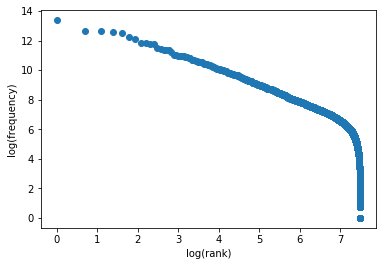

In [10]:
import math
import operator
x = []
y = []
X_LABEL = "log(rank)"
Y_LABEL = "log(frequency)"

# implement me! you should fill the x and y arrays. Add your code here
y = [math.log(x) for x in list(sorted_dict.values())]
x = [0] * len(list(sorted_dict.values()))

current_rank = 0
previous_val = 777777777
i = 0
for key,value in sorted_dict.items():
    if value != previous_val:
        current_rank += 1
    x[i] = math.log(current_rank)
    previous_val = value
    i += 1

plt.scatter(x, y)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

**Question 1.5 (5 points)**

You should see some discontinuities on the left and right sides of this figure.  Why are we seeing them on the left?  Why are we seeing them on the right?  On the right, what are those "ledges"?


<i>The discontinuity on the left is due to the sparsenes of the log function for rank near its base value. As we are computing logs with base e(i.e 2.71828) and also as the initial ranks of the most frequent words doesn't repeat becuase of different freuquency values, the points are placed far from each other. As we take the log of higher values the sparseness of the log function decreases.</i>

<i>The discontinuity on the right is due to the same sparseness of log function for frequency near its base value.</i>

<i>The ledge is due to the fact that there are many points having who has the same low frequency values. As all the same frequency values has the same rank and there are many words having nearby ranks and same frequency, the points are near each other. Also sparseness of log function for frequency near its base value and closeness of the log function for rank far from its base value also help in forming the ledge.</i>

## Part Two: Naive Bayes

This section of the homework will walk you through coding a Naive Bayes classifier that can distinguish between positive and negative reviews (at some level of accuracy).

**Question 2.1 (10 pts) ** 

To start, implement the `update_model` function in `hw1.py`. Make sure to read the function comments so you know what to update. Also review the NaiveBayes class variables in the `def __init__` method of the NaiveBayes class  to get a sense of which statistics are important to keep track of. Once you have implemented `update_model`, run the train model function using the code below. What is the size of the vocabulary used in the training documents? You’ll need to provide the path to the dataset you downloaded to run the code.

In [11]:
nb = NaiveBayes(PATH_TO_DATA, tokenizer=tokenize_doc)
nb.train_model()

if len(nb.vocab) == 251637:
    print ("Great! The vocabulary size is {}".format(251637))
else:
    print ("Oh no! Something seems off. Double check your code before continuing. Maybe a mistake in update_model?")

REPORTING CORPUS STATISTICS
NUMBER OF DOCUMENTS IN POSITIVE CLASS: 12500.0
NUMBER OF DOCUMENTS IN NEGATIVE CLASS: 12500.0
NUMBER OF TOKENS IN POSITIVE CLASS: 2958832.0
NUMBER OF TOKENS IN NEGATIVE CLASS: 2885848.0
VOCABULARY SIZE: NUMBER OF UNIQUE WORDTYPES IN TRAINING CORPUS: 251637
Great! The vocabulary size is 251637


#### Exploratory analysis

Let’s begin to explore the count statistics stored by the update model function. Implement the provided `top_n` function to find the top 10 most common words in the positive class and top 10 most common words in the negative class. 

In [12]:
print ("TOP 10 WORDS FOR CLASS " + POS_LABEL + ":")
for tok, count in nb.top_n(POS_LABEL, 10):
    print ('', tok, count)
print ()

print ("TOP 10 WORDS FOR CLASS " + NEG_LABEL + ":")
for tok, count in nb.top_n(NEG_LABEL, 10):
    print ('', tok, count)
print ()

TOP 10 WORDS FOR CLASS pos:
 the 165805.0
 and 87029.0
 a 82055.0
 of 76155.0
 to 65869.0
 is 55785.0
 in 48422.0
 i 33143.0
 it 32802.0
 that 32705.0

TOP 10 WORDS FOR CLASS neg:
 the 156393.0
 a 77898.0
 and 71543.0
 of 68307.0
 to 68098.0
 is 48386.0
 in 42105.0
 i 37337.0
 this 37301.0
 that 33587.0



**Question 2.2 (5 points)**

What is the first thing that you notice when you look at the top 10 words for the 2 classes? Are these words helpful for discriminating between the two classes? Do you think this trend carries forward to other texts from the English language? What about other languages?


<i>Most of the top 10 words in both the categories are the same. They are the general English language articles, prepositions and conjunctions which are used most frequently.These words are not at all helpful in discriminating between the classes because they don't have any positive or negative meaning which might help.Most of the other texts except maybe poems in English language will have these sets of words in their top words list with some variety.Other language also will have similar version of these common words and thus they will appear more than the other words.</i>

**Question 2.3 (10 pts) **

The Naive Bayes model assumes that all features are conditionally independent given the class label. For our purposes, this means that the probability of seeing a particular word in a document with class label $y$ is independent of the rest of the words in that document. Implement the `p_word_given_label` function. This function calculates P (w|y) (i.e., the probability of seeing word w in a document given the label of that document is y).

Use your `p_word_given_label` function to compute the probability of seeing the word “amazing” given each sentiment label. Repeat the computation for the word “dull.” 

In [13]:
print ("P('amazing'|pos):",  nb.p_word_given_label("amazing", POS_LABEL))
print ("P('amazing'|neg):",  nb.p_word_given_label("amazing", NEG_LABEL))
print ("P('dull'|pos):",  nb.p_word_given_label("dull", POS_LABEL))
print ("P('dull'|neg):",  nb.p_word_given_label("dull", NEG_LABEL))

P('amazing'|pos): 0.00026158970837141145
P('amazing'|neg): 7.207586816769282e-05
P('dull'|pos): 3.278320634628799e-05
P('dull'|neg): 0.00014311218054450546


Which word has a higher probability, given the positive class? Which word has a higher probability, given the negative class? Is this behavior expected?


<i>The word 'amazing' has higher probability given the positive class. The word 'dull' has higher probability given the negative class. This behavior is expected as amazing has positive connotation and dull has slight negative connotation.</i>

What is the purpose of the independence assumption for the Naive Bayes classifier?


<i>Assuming words are dependent of each other is not a property of naive bayes classifier. This assumption is made to make the calculation of likelihood probability</i>($P(w_{d1},\cdots,w_{dn}|y_d)$) <i>easier. Without some simplifying assumptions, estimating the probability of every possible combination of features (for example, every possible set of words and positions) would require huge numbers of parameters and impossibly large training sets.</i>

**Question 2.4 (5 pts)**

In the next cell, compute the probability of the word "stop-sign." in the positive training data and negative training data.

In [14]:
print ("P('stop-sign.'|pos):",  nb.p_word_given_label("stop-sign.", POS_LABEL))
print ("P('stop-sign.'|neg):",  nb.p_word_given_label("stop-sign.", NEG_LABEL))

P('stop-sign.'|pos): 0.0
P('stop-sign.'|neg): 3.4651859696006166e-07


What is unusual about P('stop-sign.'|pos)? Why is this a problem?

<i>'stop-sign.' doesn't appear in the positive label documents. Thus the P('stop-sign.'|pos) is resulting in zero. Naive Bayes naively multiplies all the feature likelihoods together. Zero probabilities in the likelihood term for any class will cause the probability of the entire class to be zero. Also we want to calculate the posterior probabilty in log space, so as to normalize the probability values. But as logarithm of 0 is undefined, we might face problem in our calculation. Thus, we need smoothing, so that we don't get 0 probability.</i>

**Question 2.5 (5 pts)**

We can address the issues from question 2.4 with add-$\alpha$ smoothing (like add-1 smoothing except instead of adding 1 we add $\alpha$). Implement
`p_word_given_label_and_alpha` and then run the next cell. Hint: look at the slides from the lecture and the corresponding exercise on add-1 smoothing.

In [15]:
print ("P('stop-sign.'|pos):",  nb.p_word_given_label_and_alpha("stop-sign.", POS_LABEL, 0.2))

P('stop-sign.'|pos): 6.646374399441918e-08


**Question 2.6 (5 pts)** 

*Prior and Likelihood* 

As noted before, the Naive Bayes model assumes that all words in a document are independent of one another given the document’s label. Because of this we can write the likelihood of a document as:

$P(w_{d1},\cdots,w_{dn}|y_d) = \prod_{i=1}^{n}P(w_{di}|y_d)$

However, if a document has a lot of words, the likelihood will become extremely small and we’ll encounter numerical underflow. Underflow is a common problem when dealing with probabilistic models; if you are unfamiliar with it, you can get a brief overview on [Wikipedia](https:/en.wikipedia.org/wiki/Arithmetic_underflow). To deal with underflow, a common transformation is to work in log-space.

$\log[P(w_{d1},\cdots,w_{dn}|y_d)] = \sum_{i=1}^{n}\log[P(w_{di}|y_d)]$

Implement the log_likelihood function (Hint: it should make calls to the p word given label and alpha function). Implement the log_prior function. This function takes a class label and returns the log of the fraction of the training documents that are of that label.

**Question 2.7 (5 pts) **

Naive Bayes is a model that tells us how to compute the posterior
probability of a document being of some label (i.e.,
$P(y_d|\mathbf{w_d})$).  Specifically, we do so using bayes rule:

  $P(y_d|\mathbf{w_d}) = \frac{P(y_d)P(\mathbf{w_d}|y_d)}{P(\mathbf{w_d})}$

In the previous section you implemented functions to compute both
the log prior ($\log[P(y_d)]$) and the log likelihood
($\log[P( \mathbf{w_d} |y_d)]$ ). Now, all you're missing is the
*normalizer*, $P(\mathbf{w_d})$.

Derive the normalizer by expanding $P(\mathbf{w_d})$.<br\> 


$P(\mathbf{w_d})$ = $P(\mathbf{w_d}|pos) + P(\mathbf{w_d}|neg)$

**Question 2.8 (5 pts)**

One way to classify a document is to compute the unnormalized log posterior for both labels and take the argmax (i.e., the label that yields the higher unnormalized log posterior). The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Why don’t we need to compute the log normalizer here?


<i>We don't calculate the log normalizer because its value is same for both of the classes and thus it doesn't affect the argmax.</i>

**Question 2.9 (5 pts)**

As we saw earlier, the top 10 words from each class do not give us much to go on when classifying a document. A much more powerful metric is the likelihood ratio, which is defined as

$LR(w)=\frac{P(w|y=\mathrm{pos})}{P(w|y=\mathrm{neg})}$

A word with LR 3 is 3 times more likely to appear in the positive class than in the negative. A word with LR 0.3 is one-third as likely to appear in the positive class as opposed to the negative class.

In [16]:
# Implement the nb.likelihood_ratio function and use it to investigate the likelihood ratio of "amazing" and "dull"
print ("LIKELIHOOD RATIO OF 'amazing':", nb.likelihood_ratio('amazing', 0.2))
print ("LIKELIHOOD RATIO OF 'dull':", nb.likelihood_ratio('dull', 0.2))
print ("LIKELIHOOD RATIO OF 'and':", nb.likelihood_ratio('and', 0.2))
print ("LIKELIHOOD RATIO OF 'to':", nb.likelihood_ratio('to', 0.2))

LIKELIHOOD RATIO OF 'amazing': 3.628350587556548
LIKELIHOOD RATIO OF 'dull': 0.22953174277018223
LIKELIHOOD RATIO OF 'and': 1.1869527527674362
LIKELIHOOD RATIO OF 'to': 0.9438077915764572


What is the minimum and maximum possible values the likelihood ratio can take?


<i> The minimum value and maximum value can't be calculated theoretically. The values of likeliood ratio will be in the open interval (0,Inf). </i>

Find the word in the vocabulary with the highest likelihood ratio below.

In [17]:
# Implement me!
# Print the word with the highest likelihood ratio here
curr = 0
max = 0
maxitem = ""
for item in nb.vocab:
    curr = nb.likelihood_ratio(item, 0.2)
    if(curr > max):
        max = curr
        maxitem = item
        
print("The word with the maximum likelihood ratio is : " , maxitem)

The word with the maximum likelihood ratio is :  edie


**Question 2.10 (5 pts)**

The unnormalized log posterior is the sum of the log prior and the log likelihood of the document. Implement the `unnormalized_log_posterior` function and the `classify` function. The `classify` function should use the unnormalized log posteriors but should not compute the normalizer. Once you implement the `classify` function, we'd like to evaluate its accuracy.

In [18]:
print (nb.evaluate_classifier_accuracy(0.2))

82.192


**Question 2.11 (5 pts)**

Try evaluating your model again with a smoothing parameter of 1000.

In [19]:
print (nb.evaluate_classifier_accuracy(1000.0))

78.084


Does the accuracy go up or down when the pseudo count parameter is raised to 1000? Why do you think this is?


<i>The accuracy went down when the parameter is increased to 1000. In add-α smoothing the value of α is added with the count in the numerator and multiplied with vocabulary size in the denominator. Thus if the smoothing parameter is generally bigger we lose some probability information to other unknown words. The smoothing parameter should be chosen such a way that the posterior probabilty value with smoothing should be as nearer as possible to the same without smoothing.</i>

** Question 2.12 (5 pts)** 

Find a review that your classifier got wrong. 

In [20]:
# In this cell, print out a review your classifier got wrong, along with its label.
nb.evaluate_classifier_accuracy(0.2)
nb.get_one_misclassified_review()

One misclassified review which is actually a pos
I wish there was a category to place this in other than Horror. It simply isn't. Granted it has it's horrific moments, however I don't feel that makes it a horror film. I will give that this movie could have been better. A million little things could have been changed to make it better.<br /><br />That having been said I love this movie. I'm often sad that people misunderstand the whole point of it. It has always been clear to me that the point of this movie was to say... things aren't always what they seem. Sometimes 'evil', isn't. <br /><br />Barker was at a Con I went to and he did a little talk then watch the movie thing. It was very interesting. Many things he wished to put in the movie couldn't be, and a chunk was cut out of the movie that he believed to be long lost. This was a chunk that helped shed light on Boone and his Girlfriend, as well as some other details.<br /><br />I know some people are bothered by not having more info

What are two reasons your system might have misclassified this example? What improvements could you make that may help your system classify this example correctly?

<i>Two reasons for which this review got misclassified is
1. The overall connotation of the review is quite critical. There are lots of words having negative connotation which might have greater log likelihood in the corpus.
2. Lack of strong positive words and presence of punctuations and line breaks as noise are also reasons. Thus the log likelihood values for the positive class was less in the end.

There are few improvements that can be done
1. There are some common words (pronouns, prepositions, conjuctions) which appear quite frequently. We can remove those word from the calculation of log likelihood to remove some noise.
2. We can remove punctuations too before calculating the word counts etc.
3. We can associate more weightage on Adjectives and Verbs and less weighatge on Proper Nouns while calculating to get good prediction.

**Question 2.13 (5 pts)**

Often times we care about multi-class classification rather than binary classification.

How many counts would we need to keep track of if the model were modified to support 5-class classification?


<i>For 5-class classification we need to keep track of 5 unnormalized_log_posterior values. And to precit the correct label we need to pick the label having the highest unnormalized_log_posterior value.</i>

What would be the new decision rule (i.e., how would the classify function change)?


<i>The new decision rule will be to find the label having the highest unnormalized_log_posterior value. We can store the unnormalized_log_posterior values in an numpy array and then use numpy argmax function to find the label having the highest value. That label will be our predicted one.</i>